In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
np.random.seed(42)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
model = Sequential()
model.add(Dense(1200, input_dim=784, activation="relu", kernel_initializer="normal"))
model.add(Dense(1200, activation="relu", kernel_initializer="normal"))
model.add(Dense(1200, activation="relu", kernel_initializer="normal"))
model.add(Dense(10, activation="softmax", kernel_initializer="normal"))
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
print(model.summary())
model.fit(X_train, Y_train, batch_size=50, epochs=40, validation_split=0.1, verbose=2)
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))
##в начале путем проб удалось выявить что именно такая структура сети даст наибольшую точность##
##затем произвел тесты над размером подвыборки, при минимальном получил максимальную точность валид скор маленький,
# соответственно переобучения нет
##однако оно начинает появляться при увеличении количества больше 50, 
# соответственно убрал это путём увеличения в 2 раза размера подвыборки
##Количество эпох более 40 начинанает давать переобучение модели,
# соответственно 40-оптимальное число(на самом деле небольшоее переобучение уже есть, но незначительное)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                │ (None, 1200)           │       942,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 1200)           │     1,441,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 1200)           │     1,441,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 10)             │        12,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,836,410 (14.63 MB)

 Trainable params: 3,836,410 (14.63 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/40
1080/1080 - 10s - 9ms/step - accuracy: 0.8910 - loss: 0.3941 - val_accuracy: 0.9508 - val_loss: 0.1873
Epoch 2/40
1080/1080 - 9s - 8ms/step - accuracy: 0.9444 - loss: 0.1968 - val_accuracy: 0.9612 - val_loss: 0.1403
Epoch 3/40
1080/1080 - 8s - 8ms/step - accuracy: 0.9574 - loss: 0.1499 - val_accuracy: 0.9665 - val_loss: 0.1210
Epoch 4/40
1080/1080 - 8s - 8ms/step - accuracy: 0.9655 - loss: 0.1215 - val_accuracy: 0.9692 - val_loss: 0.1089
Epoch 5/40
1080/1080 - 8s - 8ms/step - accuracy: 0.9715 - loss: 0.1013 - val_accuracy: 0.9720 - val_loss: 0.1008
Epoch 6/40
1080/1080 - 8s - 8ms/step - accuracy: 0.9767 - loss: 0.0857 - val_accuracy: 0.9743 - val_loss: 0.0915
Epoch 7/40
1080/1080 - 9s - 8ms/step - accuracy: 0.9796 - loss: 0.0742 - val_accuracy: 0.9743 - val_loss: 0.0950
Epoch 8/40
1080/1080 - 8s - 8ms/step - accuracy: 0.9829 - loss: 0.0646 - val_accuracy: 0.9767 - val_loss: 0.0814
Epoch 9/40
1080/1080 - 8s - 8ms/step - accuracy: 0.9852 - loss: 0.0564 - val_accuracy: 0.9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


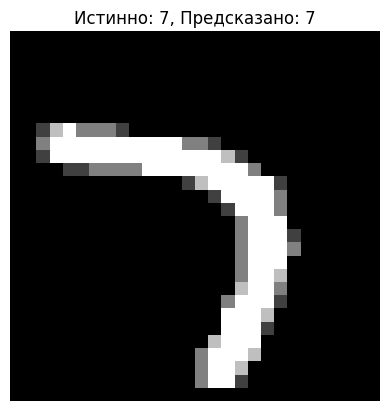

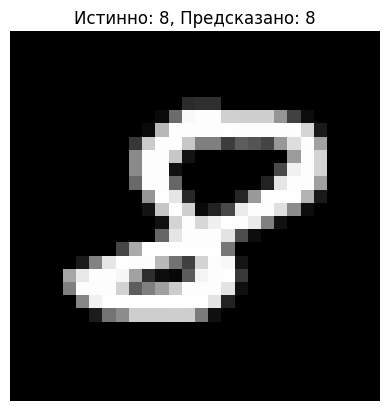

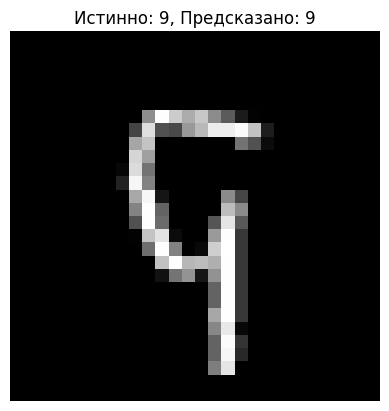

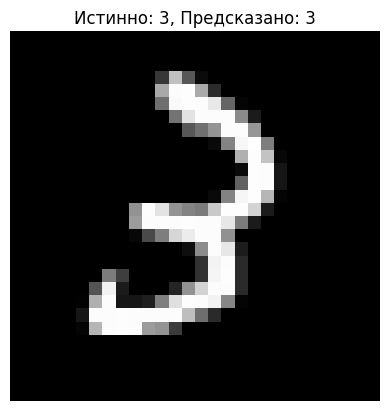

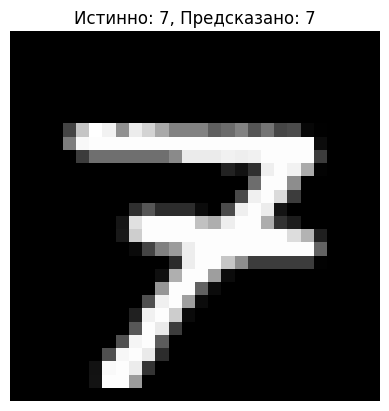

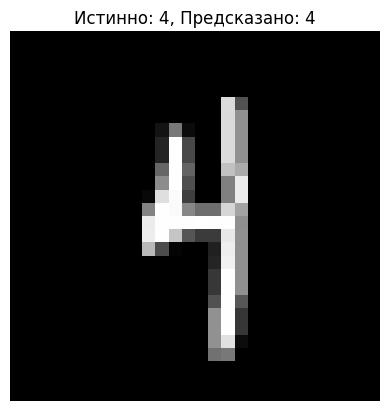

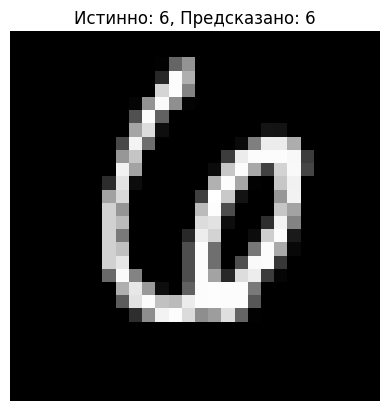

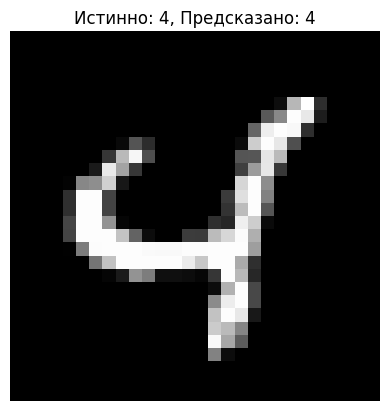

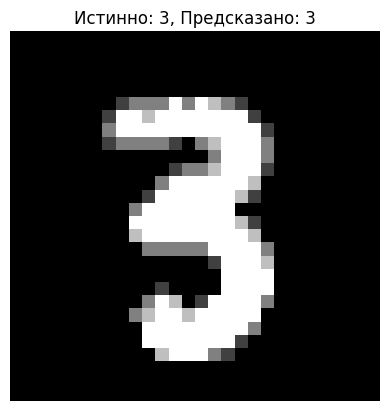

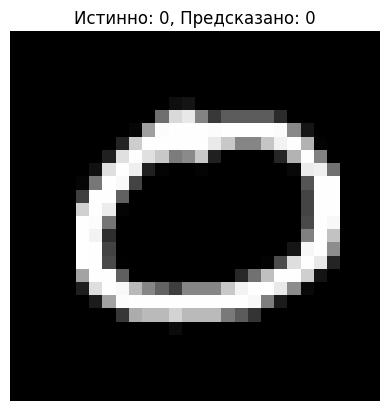

In [113]:
num_samples = 10
samples = X_test[60:num_samples+60]
true_labels = y_test[60:60+num_samples]
predictions = model.predict(samples)
for i in range(num_samples):
    plt.imshow(samples[i].reshape(28,28), cmap='gray')
    plt.title(f"Истинно: {true_labels[i]}, Предсказано: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()

In [114]:
model_json = model.to_json()
json_file = open("mnist_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("mnist_model.weights.h5")

In [2]:
from keras.models import model_from_json
from PIL import Image, ImageEnhance

In [4]:
json_file = open("mnist_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("mnist_model.weights.h5")
loaded_model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
##scores = loaded_model.evaluate(X_test, Y_test, verbose=0)
##print("Точность модели на тестовых данных: %.2f%%" % (scores[1]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
[[8.3475524e-01 1.1359843e-09 2.6596989e-04 5.0742042e-08 2.0474470e-05
  2.2247773e-09 3.8283629e-06 3.3367411e-04 2.9175231e-07 1.6462044e-01]]
[0]


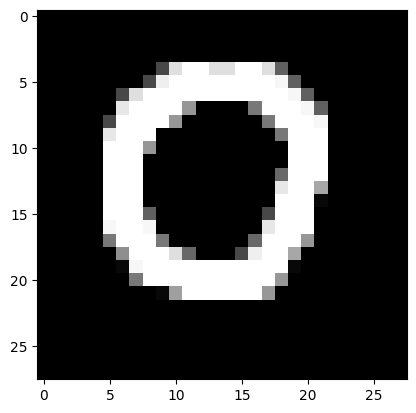

In [7]:
im = Image.open("0.png")
im_grey = im.convert('L')
im_array = np.array(im_grey)
im_array=np.reshape(im_array, (1, 784)).astype('float32')
x = 255 - im_array
x/=255
plt.imshow(x.reshape(28,28), cmap='gray')
prediction = loaded_model.predict(x)
print(prediction)
prediction = np.argmax(prediction, axis=1)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.00093835 0.5575476  0.1078931  0.19199769 0.00101363 0.00530903
  0.01700963 0.01502347 0.10265102 0.00061647]]
[1]


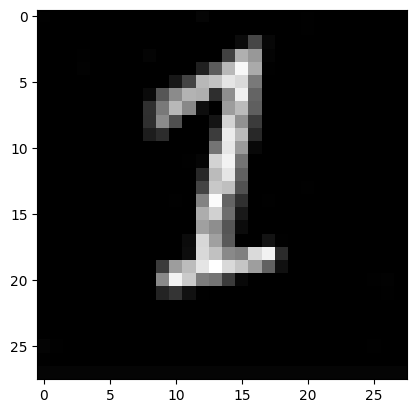

In [12]:
im2 = Image.open("test.jpg")
enhancer = ImageEnhance.Contrast(im2)
im2 = enhancer.enhance(100)
im_grey2 = im2.convert('L')
im_resized=im_grey2.resize((28,28))
im_array2 = np.array(im_resized)
im_array2=np.reshape(im_array2, (1, 784)).astype('float32')
x2 = 255 - im_array2
x2/=255
plt.imshow(x2.reshape(28,28), cmap='gray')
prediction2 = loaded_model.predict(x2)
print(prediction2)
prediction2 = np.argmax(prediction2, axis=1)
print(prediction2)